## Document Analysis of 20 Histories

#### Project HackMD card
https://hackmd.io/DgWmLHo_SvGBVjUs57O70g?both

In [1]:
from Book2 import Book
import re
import os, time, datetime
import pandas as pd
import altair as alt
import numpy as np


In [2]:
from zhon import hanzi
hanzi.punctuation

'＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'

In [3]:
from DocCollect import AddChar2Dict, AddWord2Dict, DictTopN, \
getIndentedDocuments, getQuotedDocuments, getQuotedDocumentsFromCommentaries, \
Histories, HistoryE2C, HistoryC2E, normalizeBookNames, \
RetrieveDocumentsMain, RetrieveDocumentsCommentary, \
scrollNum, sectionType, processScrollSectionDicts, \
consolidateCommentaries, getDocsSummary, SectionDict

In [4]:
HistoryE2C['Sanguozhi'], HistoryC2E['後漢書']

('三國志', 'HouHanShu')

In [5]:
BeginTime = time.time()

In [6]:
Books = [None] * len(Histories)
for i, hist in enumerate(Histories):
    #if hist != 'Sanguozhi': continue
    Books[i] = Book(bookname=hist, date="2019-07-23", creator="ILP")
    Books[i].load_htmls(f"./data/medievalHistories/{hist}/")
    Books[i].extract_paths()
    Books[i].metainfo()
    Books[i].strip_all_irrelevant_tags()
    normalizeBookNames(Books[i]) # change 'book title' in flat_meta from Chinese to pinyin 
    processScrollSectionDicts(Books[i])
    #
    ## BEGIN: Special treatment for Sanguozhi
    if hist == 'Sanguozhi':
        consolidateCommentaries(Books[i])
        RetrieveDocumentsCommentary(Books[i])
    else:  # Commentaries for all the other 19 books should be deleted 
        Books[i].commentaries = None
    ## END: Special treatment for Sanguozhi
    RetrieveDocumentsMain(Books[i])
    getDocsSummary(Books[i])
    #if i > 6: break


INFO:root:Stop at loading ./data/medievalHistories/Shiji/Shiji_0392.html.
INFO:root:Total length of the data is 392.


Shiji
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
392


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Hanshu/Hanshu_0897.html.
INFO:root:Total length of the data is 897.


Hanshu
list index out of range
897


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Sanguozhi/Sanguozhi_0495.html.
INFO:root:Total length of the data is 495.


Sanguozhi
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
495


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/HouHanShu/HouHanShu_1141.html.
INFO:root:Total length of the data is 1141.


HouHanShu
1141


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Songshu/Songshu_0969.html.
INFO:root:Total length of the data is 969.


Songshu
969


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Nanqishu/Nanqishu_0822.html.
INFO:root:Total length of the data is 822.


Nanqishu
list index out of range
822


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Weishu/Weishu_1614.html.
INFO:root:Total length of the data is 1614.


Weishu
1614


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/LiangShu/LiangShu_0399.html.
INFO:root:Total length of the data is 399.


LiangShu
list index out of range
399


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Chenshu/Chenshu_0255.html.
INFO:root:Total length of the data is 255.


Chenshu
list index out of range
255


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/BeiQishu/BeiQishu_0342.html.
INFO:root:Total length of the data is 342.


BeiQishu
list index out of range
342


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Zhoushu/Zhoushu_0358.html.
INFO:root:Total length of the data is 358.


Zhoushu
list index out of range
358


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/SuiShu/SuiShu_1003.html.
INFO:root:Total length of the data is 1003.


SuiShu
list index out of range
1003


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Jinshu/Jinshu_1454.html.
INFO:root:Total length of the data is 1454.


Jinshu
1454


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Nanshi/Nanshi_1066.html.
INFO:root:Total length of the data is 1066.


Nanshi
1066


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Beishi/Beishi_1435.html.
INFO:root:Total length of the data is 1435.


Beishi
1435


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/JiuTangshu/JiuTangshu_2368.html.
INFO:root:Total length of the data is 2368.


JiuTangshu
list index out of range
list index out of range
2368


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/XinTangshu/XinTangshu_2727.html.
INFO:root:Total length of the data is 2727.


XinTangshu
list index out of range
2727


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/JiuWudaishi/JiuWudaishi_0858.html.
INFO:root:Total length of the data is 858.


JiuWudaishi
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
list index out of range
858


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/XinWudaishi/XinWudaishi_0498.html.
INFO:root:Total length of the data is 498.


XinWudaishi
498


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.
INFO:root:Stop at loading ./data/medievalHistories/Songshi/Songshi_4413.html.
INFO:root:Total length of the data is 4413.


Songshi
4413


INFO:root:Remove the new lines added by the page dividers, connect the paragraphs before and after the new lines.
INFO:root:Remove 標註, page number, and page dividers from the tree structure.


### Create a unifed pandas dataframe from the docsSummary attribute of each book

In [7]:
# Column names and their data types for pandas dataframe

column_names_text = '''
book fileno scrollno section 
grandChar commentaryChar
iDocsM iDocsCharM qDocsM qDocsCharM 
qDocsC qDocsCharC 
'''
column_names = column_names_text.strip().split()

### Data dictionary (meanings of column names above)
# book           = 'book name', e.g. Sanguozhi
# fileno         = 'file no.' (HTML serial no.)
# scrollno       = 'scroll no.' i.e., 卷
# section        = 'section', e.g., 列傳，本紀
# grandChar      = 'total char count, minus commentaries, bookmark'
# commentaryChar = 'total commentary char count'
# iDocsM         = indented docs from Main Text, document count
# iDocsCharM     = indented docs from Main Text, total char count
# qDocsM         = quoted docs from Main Text, document count
# qDocsCharM     = quoted docs from Main Text, total char count
# qDocsC         = quoted docs from Commentaries, document count
# qDocsCharC     = quoted docs from Commentaries, total char count

data_types_str = '''
str str Int64 str
Int64 Int64 
Int64 Int64 Int64 Int64 
Int64 Int64
'''
data_types = data_types_str.strip().split()

# the following column data types will be imposed on the DataFrame after it is created ('astype')
col_dtype = {c: data_types[i] for i, c in enumerate(column_names)}  # dictionary comprehension
col_dtype

{'book': 'str',
 'fileno': 'str',
 'scrollno': 'Int64',
 'section': 'str',
 'grandChar': 'Int64',
 'commentaryChar': 'Int64',
 'iDocsM': 'Int64',
 'iDocsCharM': 'Int64',
 'qDocsM': 'Int64',
 'qDocsCharM': 'Int64',
 'qDocsC': 'Int64',
 'qDocsCharC': 'Int64'}

In [8]:
All_Summary = []
for book in Books:
    if book is None: continue
    All_Summary.extend(book.docsSummary)
df = pd.DataFrame(data=All_Summary, columns=column_names)
df = df.astype(col_dtype)

## Now add two columns: 'total docs count' and 'total docs char count'
df['docsTotal']     = df['iDocsM'] + df['qDocsM'] + df['qDocsC']
df['docsCharTotal'] = df['iDocsCharM'] + df['qDocsCharM'] + df['qDocsCharC']
df['regTextMCharTotal'] = df['grandChar'] - df['iDocsM'] - df['qDocsM']


In [9]:
df.shape

(23506, 15)

#### Possible values of 'section' column
 '世家',  '傳:', '列傳', '史記正義', '吳書', '志', '書', '本紀',
 '紀:', '蜀書', '表', '魏書', '點校後記'

### 'dfBios' below contains the portions of the histories that we're studying (列傳, except 三國志)

In [10]:
# Concatenating history using pandas.concat() function
dfBios = df[ (df.book==Histories[0]) & (df.section.isin(['列傳'])) ]  # initialize first book
for hist in Histories[1:]:
    if hist is None: continue
    #print(hist)
    if hist == 'Sanguozhi': # we want everything
        newdf = df[ df.book==hist ]  
    else:
        newdf = df[ (df.book==hist) & (df.section.isin(['列傳'])) ]
    dfBios = pd.concat([dfBios, newdf])
        

In [11]:
dfBios.shape

(12533, 15)

### Plot total no. of characters in documents by book

In [12]:
xx = dfBios.groupby('book')['grandChar', 'iDocsM', 'iDocsCharM', 'qDocsM', 'qDocsCharM', 'commentaryChar', 'qDocsC', 'qDocsCharC'].sum()
xx['DocPercentage'] = (xx['iDocsCharM'] + xx['qDocsCharM'] + xx['qDocsCharC']) / (xx['grandChar']  + xx['commentaryChar'])                  
xx

,grandChar,iDocsM,iDocsCharM,qDocsM,qDocsCharM,commentaryChar,qDocsC,qDocsCharC,DocPercentage
book,,,,,,,,,
BeiQishu,217321,12,11259,14,3234,0,0,0,0.066689
Beishi,1194214,111,79844,137,32845,0,0,0,0.094362
Chenshu,151600,14,15122,34,9105,0,0,0,0.159809
Hanshu,633699,110,115276,271,76805,0,0,0,0.303111
HouHanShu,649958,93,84869,262,77377,0,0,0,0.249625
Jinshu,790750,178,150417,265,68055,0,0,0,0.276285
JiuTangshu,1538613,338,230831,295,64254,0,0,0,0.191786
LiangShu,300801,40,45658,80,22898,0,0,0,0.227911
Nanqishu,246422,38,31032,101,28595,0,0,0,0.241971


#### Show doc percentage by book

In [13]:
def percentagDocByBook(df):
    dfPlot1 = pd.DataFrame({
        'book': df.index.to_numpy(),
        'DocPercentage': df['DocPercentage'].to_numpy()
    })
    return alt.Chart(dfPlot1).mark_bar().encode(
        y=alt.Y('book', sort=Histories),
        x=alt.X('DocPercentage', axis=alt.Axis(format='%', title='Document % by Book'))
    )

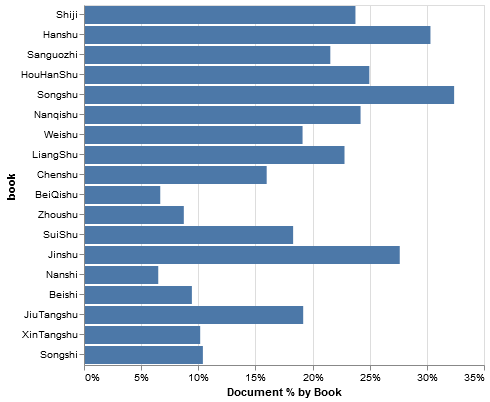

In [14]:
percentagDocByBook(xx)

### Plot total document count and total document character count by scroll no. for a given book

In [15]:
zz = dfBios[dfBios.book=='HouHanShu'].groupby('scrollno')['grandChar', 'iDocsM', 'iDocsCharM', 'qDocsM', 'qDocsCharM', 'commentaryChar', 'qDocsC', 'qDocsCharC'].sum()
zz['DocPercentage'] = (zz['iDocsCharM'] + zz['qDocsCharM'] + zz['qDocsCharC']) / (zz['grandChar']  + zz['commentaryChar'])                  
zz.head(20)

,grandChar,iDocsM,iDocsCharM,qDocsM,qDocsCharM,commentaryChar,qDocsC,qDocsCharC,DocPercentage
scrollno,,,,,,,,,
11,7011,0,0,1,233,0,0,0,0.033233
12,6465,0,0,2,471,0,0,0,0.072854
13,9090,1,835,6,1663,0,0,0,0.274807
14,6125,0,0,1,203,0,0,0,0.033143
15,6688,0,0,2,377,0,0,0,0.056370
16,11143,1,1106,3,581,0,0,0,0.151395
17,9492,0,0,3,644,0,0,0,0.067847
18,7372,0,0,2,420,0,0,0,0.056972
19,8042,0,0,1,222,0,0,0,0.027605


In [16]:
def chartDocsByScroll(df, book):

    zz = df[df.book==book].groupby('scrollno')['grandChar', 'iDocsM', 'iDocsCharM', 'qDocsM', 'qDocsCharM', 'commentaryChar', 'qDocsC', 'qDocsCharC'].sum()
    zz['DocPercentage'] = (zz['iDocsCharM'] + zz['qDocsCharM'] + zz['qDocsCharC']) / (zz['grandChar']  + zz['commentaryChar'])                  

    # doc count
    dfPlot1 = pd.DataFrame({
        'scrollno': zz.index.to_numpy(),
        'Docs': zz['iDocsM'].to_numpy() + zz['qDocsM'].to_numpy() + zz['qDocsC'].to_numpy()
    })
    chart1 = alt.Chart(dfPlot1).mark_bar().encode(
        y=alt.Y('Docs:Q', axis=alt.Axis(format='', title='Total Document Count \n(indented+quoted) by Scroll')),
        x='scrollno:O'
    )
    # doc character count
    dfPlot2 = pd.DataFrame({
        'scrollno': zz.index.to_numpy(),
        'DocsChar': zz['iDocsCharM'].to_numpy() + zz['qDocsCharM'].to_numpy() + zz['qDocsCharC'].to_numpy()
    })
    chart2 = alt.Chart(dfPlot2).mark_bar().encode(
        y=alt.Y('DocsChar:Q', axis=alt.Axis(format='', title='Total Document Character Count (indented+quoted) by Scroll')),
        x='scrollno:O'
    )
    # doc character % as total main text
    dfPlot3 = pd.DataFrame({
        'scrollno': zz.index.to_numpy(),
        'DocsPercentM': (zz['iDocsCharM'].to_numpy() + zz['qDocsCharM'].to_numpy()  + zz['qDocsCharC'].to_numpy()) / \
                        (zz['grandChar'].to_numpy() + zz['commentaryChar'].to_numpy())
    })
    chart3 = alt.Chart(dfPlot3).mark_bar().encode(
        y=alt.Y('DocsPercentM:Q', axis=alt.Axis(format='%', title='Document % by Scroll')),
        x='scrollno:O'
    )
    
    return alt.vconcat(chart1, chart2, chart3)

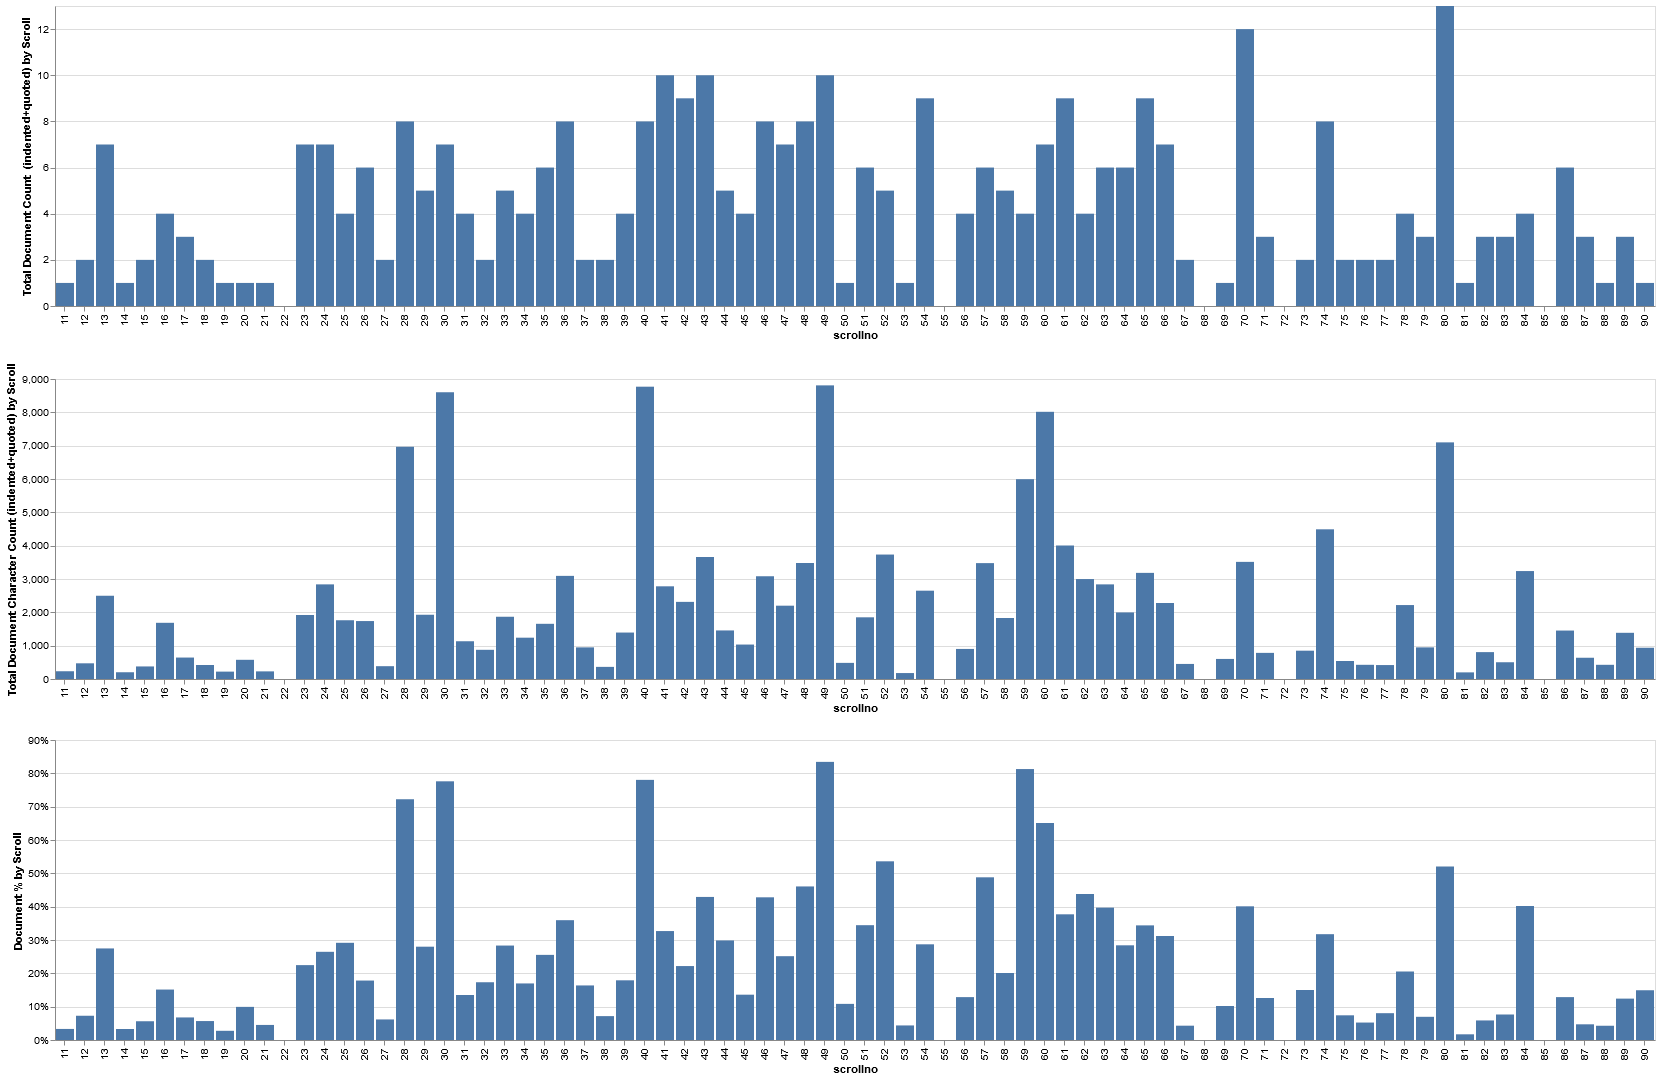

In [17]:
chartDocsByScroll(dfBios, 'HouHanShu')

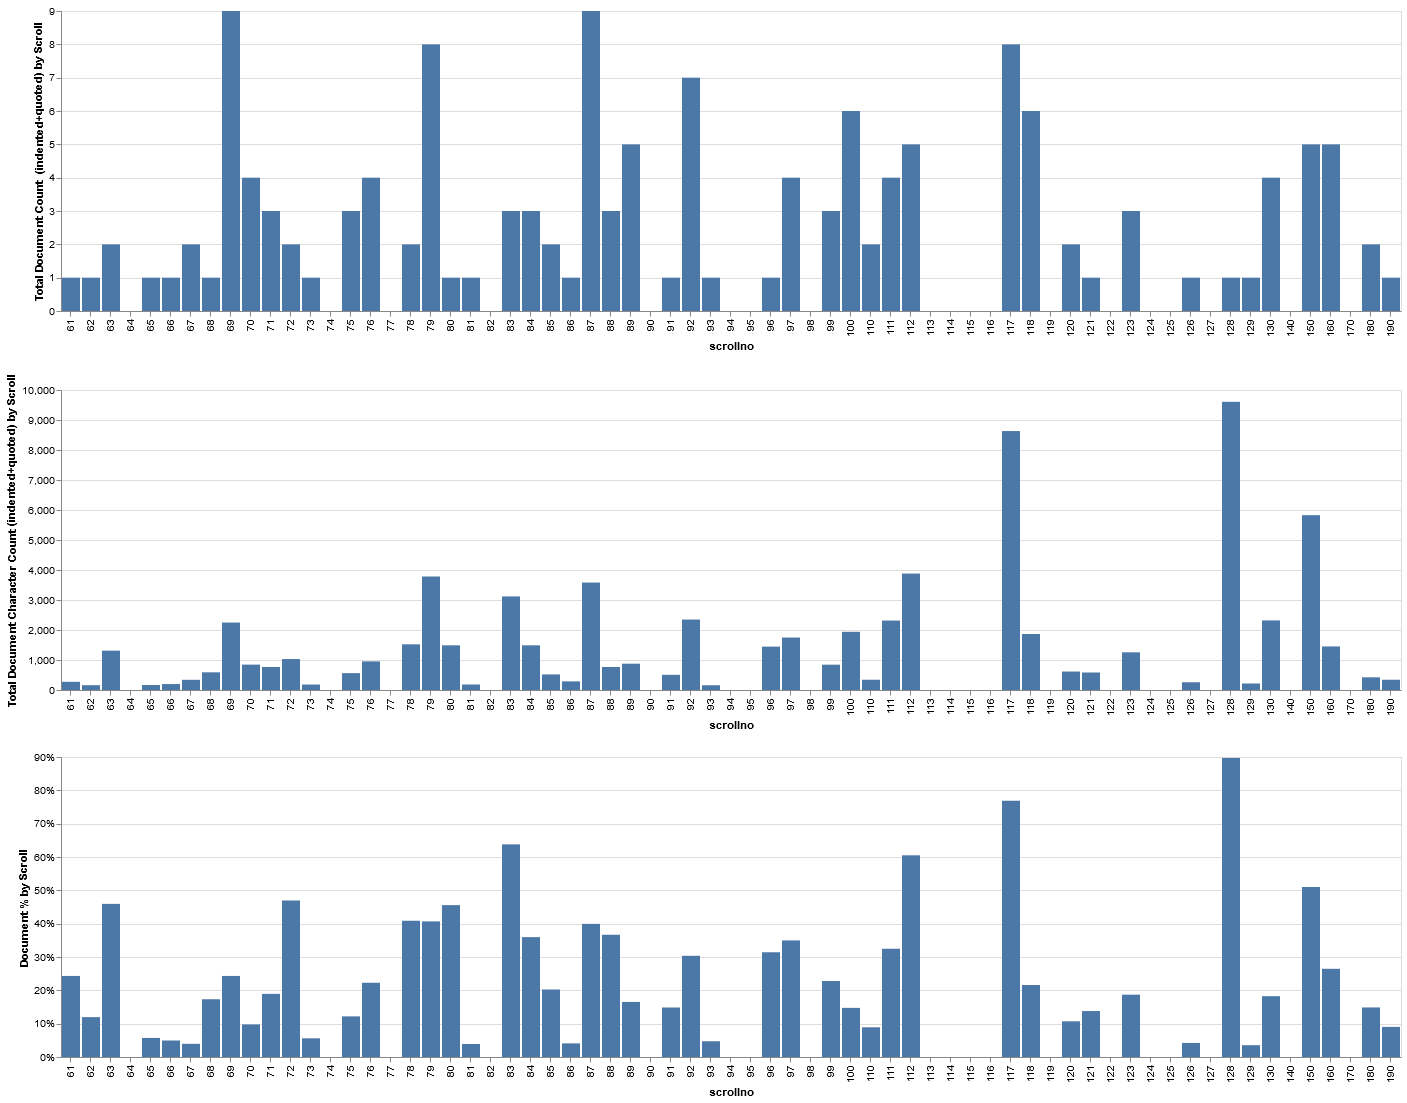

In [18]:
chartDocsByScroll(dfBios, 'Shiji')

### Build some vocabulary lists

In [19]:
# use these 'sentence-terminating' punctuation marks to break 
# paragraphs into sentences
regex_punc = re.compile(fr"[{hanzi.punctuation}]")
regex_punc

re.compile(r'[＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。]',
re.UNICODE)

In [20]:
### This utility funtion subtract word counts of one dictionary from another
def DictSubtract(D1, D2):
    '''
    D1 - D2: Subtract D2 from D1
    Note that the 'value' in the each dictionary's key-value pair must be numeric
    Example:
      Given: D1 = {'a':16, 'b': 7, 'c': 12}
             D2 = {'b':3, 'c': 16, 'e': 5}
      Then:  D1 - D2 will be {'a': 16, 'b': 4, 'c': -4 }
    '''
    D3 = dict(D1) # make a copy of D1
    for k in D2.keys():
        if k in D3:
            D3[k] -= D2[k]  # subtract D2[k] from
    
    return D3   
# test
D1 = {'a':16, 'b': 7, 'c': 12}
D2 = {'b':3, 'c': 16, 'e': 5}
DictSubtract(D1, D2)

{'a': 16, 'b': 4, 'c': -4}

In [21]:
# utility function to check if the given history and fileno correspond to a 列傳 
def isBio(hist, fileno):
    if hist=='Sanguozhi':
        return True
    else:
        try:
            return '傳' in SectionDict[f"{hist}\t{fileno}"]
        except:
            return False
    

In [22]:
isBio('Shiji', '0374')
isBio('Songshu', '0601')


True

In [23]:
for i, hist in enumerate(Histories):
    print(hist)
    book = Books[i]
    book.Vocab1 = {'Reg': {}, 'Doc': {}}  # character-based vocabulary for regular text and for documents 
    book.Vocab2 = {'Reg': {}, 'Doc': {}}  # 2-character-word-based vocabulary for regular text and for documents 

    # the following are common to all 20 histories
    for fileno, doclist in book.iDocsM.items():
        if not isBio(hist, fileno): continue
        for d in doclist:
            pieces = regex_punc.split(d.strip().replace('\n',''))
            for p in pieces:
                AddChar2Dict(p, book.Vocab1['Doc'])
                AddWord2Dict(p, book.Vocab2['Doc'])
    for fileno, doclist in book.qDocsM.items():
        if not isBio(hist, fileno): continue
        for d in doclist:
            pieces = regex_punc.split(d.strip().replace('\n',''))
            for p in pieces:
                AddChar2Dict(p, book.Vocab1['Doc'])
                AddWord2Dict(p, book.Vocab2['Doc'])
    for fileno, node in enumerate(book.flat_bodies):            
        if isBio(hist, str(fileno).zfill(4)): continue
        pieces = regex_punc.split(node.body.text.strip().replace('\n',''))
        for p in pieces:
            AddChar2Dict(p, book.Vocab1['Reg'])
            AddWord2Dict(p, book.Vocab2['Reg'])
    # BEGIN: special treatment for Sanguozhi
    if hist == 'Sanguozhi':
        for fileno, commentarylist in Books[i].commentaries.items():
            for c in commentarylist:
                pieces = regex_punc.split(c.strip().replace('\n',''))
                for p in pieces:
                    AddChar2Dict(p, book.Vocab1['Reg'])
                    AddWord2Dict(p, book.Vocab2['Reg'])
    # END: special treatment for Sanguozhi
    # Now we subtract Doc from Reg to get "true Reg"       
    book.Vocab1['Reg'] = DictSubtract(book.Vocab1['Reg'], book.Vocab1['Doc'])
    book.Vocab2['Reg'] = DictSubtract(book.Vocab2['Reg'], book.Vocab2['Doc'])
            

Shiji
Hanshu
Sanguozhi
HouHanShu
Songshu
Nanqishu
Weishu
LiangShu
Chenshu
BeiQishu
Zhoushu
SuiShu
Jinshu
Nanshi
Beishi
JiuTangshu
XinTangshu
JiuWudaishi
XinWudaishi
Songshi


### Check a few dictionaries

In [24]:
hist = 'HouHanShu' # 'HouHanShu' #
book = Books[Histories.index(hist)]
DictTopN(book.Vocab2['Reg'], 20)

[('將軍', 314),
 ('元年', 238),
 ('一人', 228),
 ('太后', 213),
 ('正月', 203),
 ('司徒', 202),
 ('司空', 197),
 ('太尉', 191),
 ('皇后', 184),
 ('四月', 183),
 ('千石', 181),
 ('更始', 176),
 ('六月', 175),
 ('七月', 161),
 ('校尉', 152),
 ('一月', 148),
 ('大將', 144),
 ('貴人', 125),
 ('太守', 121),
 ('光武', 117)]

In [25]:
DictTopN(book.Vocab2['Doc'], 20)

[('陛下', 304),
 ('天下', 237),
 ('以為', 171),
 ('不可', 166),
 ('將軍', 131),
 ('所以', 130),
 ('不能', 125),
 ('是以', 108),
 ('不得', 87),
 ('以來', 79),
 ('百姓', 78),
 ('春秋', 73),
 ('君子', 67),
 ('不敢', 66),
 ('天地', 63),
 ('然後', 63),
 ('不足', 59),
 ('海內', 57),
 ('不知', 54),
 ('孔子', 53)]

In [26]:
hist = 'Songshu' # 'HouHanShu' #
book = Books[Histories.index(hist)]
DictTopN(book.Vocab2['Reg'], 20)

[('刺史', 1323),
 ('元年', 945),
 ('將軍', 944),
 ('太康', 603),
 ('太守', 536),
 ('四月', 418),
 ('正月', 408),
 ('七月', 393),
 ('尚書', 386),
 ('六月', 374),
 ('大明', 345),
 ('一月', 307),
 ('泰始', 267),
 ('豫州', 262),
 ('太白', 260),
 ('地志', 256),
 ('天下', 251),
 ('司馬', 235),
 ('一人', 232),
 ('連理', 230)]

In [27]:
DictTopN(book.Vocab2['Doc'], 20)

[('將軍', 237),
 ('不可', 137),
 ('所以', 113),
 ('陛下', 113),
 ('以為', 102),
 ('不能', 96),
 ('刺史', 93),
 ('是以', 85),
 ('天下', 84),
 ('不得', 76),
 ('不知', 73),
 ('至於', 60),
 ('軍事', 52),
 ('如此', 50),
 ('尚書', 48),
 ('不足', 47),
 ('以來', 46),
 ('持節', 46),
 ('小人', 44),
 ('左右', 43)]

In [28]:
book.Vocab2['Reg']['將軍'] + book.Vocab2['Doc']['將軍'] 

1181

In [29]:
EndTime = time.time()
ElapsedTime = EndTime - BeginTime
print(f"Total time elapsed: {ElapsedTime:.4f} sec(s)")

Total time elapsed: 496.0592 sec(s)
